In [2]:

%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1.(2 pts) What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.
Inductive reasoning is a line of reasoning that is formated like drawing conclusions from a general line. For example dogs can get rabies and dementia, so all dogs can get diseases, and so all dogs will have disease. Deductive reasoning is when you use general reasoning to get to a specific conclution. All dogs have 4 legs, if this statment is true then shnauzers are dogs.

2. (8 pts) Preprocess your dataset. 

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
columns_to_one_hot = ['age', 'workclass', 'fnlwgt', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
sex_map = {'Male': 1, 'Female':2}
workclass_map = {'Private': 1, 'Self-emp-not-inc': 2, 'Self-emp-inc': 3, 'Federal-gov': 4, 'Local-gov': 5, 'State-gov': 6, 'Without-pay': 7, 'Never-worked': 8}
education_map = {'Bachelors': 1, 'Some-college': 2, '11th': 3, 'HS-grad': 4, 'Prof-school': 5, 'Assoc-acdm': 6, 'Assoc-voc': 7, '9th': 8, '7th-8th': 9, '12th': 10, 'Masters': 11, '1st-4th': 12, '10th': 13, 'Doctorate': 14, '5th-6th': 15, 'Preschool': 16}
maritalstatus_map = {'Married-civ-spouse': 1, 'Divorced': 2, 'Never-married': 3, 'Separated': 4, 'Widowed': 5, 'Married-spouse-absent': 6, 'Married-AF-spouse': 7}
occupation_map = {'Tech-support': 1, 'Craft-repair': 2, 'Other-service': 3, 'Sales': 4, 'Exec-managerial': 5, 'Prof-specialty': 6, 'Handlers-cleaners': 7, 'Machine-op-inspct': 8, 'Adm-clerical': 9, 'Farming-fishing': 10, 'Transport-moving': 11, 'Priv-house-serv': 12, 'Protective-serv': 13, 'Armed-Forces': 14}
relationship_map = {'Wife': 1, 'Own-child': 2, 'Husband': 3, 'Not-in-family': 4, 'Other-relative': 5, 'Unmarried': 6}
race_map = {'White': 1, 'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4, 'Black': 5}
nativecountry_map = {'United-States': 1, 'Cambodia': 2, 'England': 4, 'Puerto-Rico': 5, 'Canada': 6, 'Germany': 7, 
                      'Outlying-US(Guam-USVI-etc)': 8, 'India': 9, 'Japan': 10, 'Greece': 11, 'South': 12, 'China': 13, 
                      'Cuba': 14, 'Iran': 15, 'Honduras': 16, 'Philippines': 17, 'Italy': 18, 'Poland': 19, 'Jamaica': 20, 
                      'Vietnam': 21, 'Mexico': 22, 'Portugal': 23, 'Ireland': 24, 'France': 25, 'Dominican-Republic': 26,
                      'Laos': 27, 'Ecuador': 28, 'Taiwan': 29, 'Haiti': 30, 'Columbia': 31, 'Hungary': 32, 'Guatemala': 33, 
                      'Nicaragua': 34, 'Scotland': 35, 'Thailand': 36, 'Yugoslavia': 37, 'El-Salvador': 38, 'Trinadad&Tobago': 39, 
                      'Peru': 40, 'Hong': 41, 'Holand-Netherlands': 42}
X['workclass'] = X['workclass'].map(workclass_map)
X['education'] = X['education'].map(education_map)
X['marital-status'] = X['marital-status'].map(maritalstatus_map)
X['occupation'] = X['occupation'].map(occupation_map)
X['relationship'] = X['relationship'].map(relationship_map)
X['race'] = X['race'].map(race_map)
X['native-country'] = X['native-country'].map(nativecountry_map)
X['sex'] = X['sex'].map(sex_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\19133\AppData\Local\Temp\ipykernel_14040\3598800234.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['workclass'] = X['workclass'].map(workclass_map)
C:\Users\19133\AppData\Local\Temp\ipykernel_14040\3598800234.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = X['education'].map(education_map)
C:\Users\19133\AppData\Local\Temp\ipykernel_14040\3598800234.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

3.(5 pts) Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.
I used parameters in this case. It functions like a guideline to improve the model. In this case it determineas how deep the tree goes as well as to keep the branching to a minmimum and we had to use minimal sample leaf insted of the other kinds in the other paramaters bceause descition trees have a proclivity to overfit.

              precision    recall  f1-score   support

       <=50K       0.57      0.94      0.71      7380
      <=50K.       0.23      0.01      0.01      3729
        >50K       0.53      0.52      0.53      2382
       >50K.       0.34      0.02      0.04      1162

    accuracy                           0.56     14653
   macro avg       0.42      0.37      0.32     14653
weighted avg       0.46      0.56      0.45     14653

Fitting 5 folds for each of 36 candidates, totalling 180 fits


NameError: name 'tree' is not defined

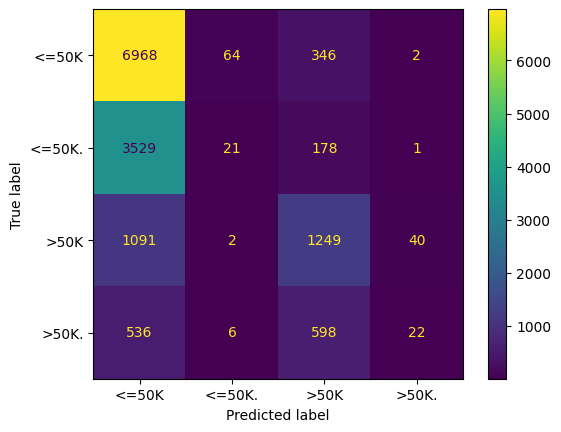

<Figure size 1200x800 with 0 Axes>

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#class code
model = DecisionTreeClassifier(max_depth=7, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# PARAM w GRID 
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, feature_names=list(X.columns), filled=True, fontsize=6, rounded=True)
plt.show()


4. (5 pts) Create a random forest model tuned to the best of your abilities. Explain how you tuned it.
So I used the same base code from class but I used the parameters to put the fine tuning part in. The param grid is there to modify the values so we limit the depth(limiting how complex the data is supposed to be), the learning rate determines the each step size in each version and limits the loss of function, and the subsample which trains the parameters on random values to reduce overfitting. The grid search CSV puts all of these itterations through to get the most efficent model and outputs a model with minamal deviations. Applied in the random forest classifier and it has a better time classifying data that is more similar to eachother becuase these distinctions are made. I chose to use the grid search CSV becuase it was apart of the sickit section and I was more familiar in applying its format.  

c:\Users\19133\CSCI\du_install\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\19133\CSCI\du_install\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


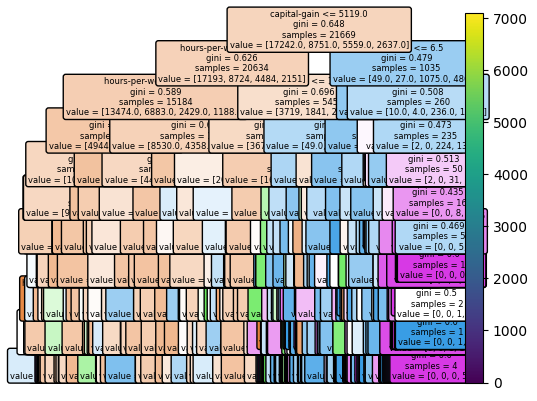

In [32]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# PARAM 
param_grid = {
    'n_estimators': [100, 150], 
    'max_depth': [10, 15],     
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']  
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
rf_tree = best_rf.estimators_[4]  
tree.plot_tree(rf_tree, feature_names=list(X.columns), filled=True, fontsize=6, rounded=True)
plt.savefig("rf_tree.svg")
plt.show()





5. (5 pts) Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.
I explained previously how the components question but applied in the XG boost it essentially does that to improve the parallel tree function, regression,classification, and ranking problems as a result this version ommits and outliers that aren't natural, and decreases the recall value to 0.07 which is actually worse so it might not be appropriate here. XG boost is not appropriate to use in large datasets so that is another reason why the fine tuning doesn't work.

c:\Users\19133\CSCI\du_install\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\19133\CSCI\du_install\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\19133\CSCI\du_install\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


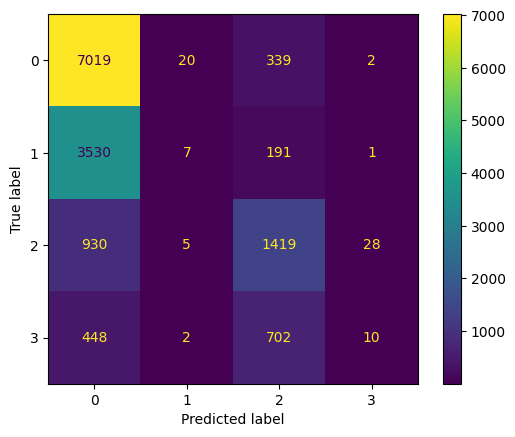

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train) 
y_test_encoded = label_encoder.transform(y_test)
#PARAM
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
xgb_model = XGBClassifier()
#Grid
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded) 
best_xgb = grid_search.best_estimator_
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.show()
#Recall
75/(978)

